## Example: Counting Rainy Days

In [1]:
import numpy as np
import pandas as pd

# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [6]:
# rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
# inches = np.array(rainfall / 254) # 1/10mm -> inches
# inches.shape
# inches

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # set plot style

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

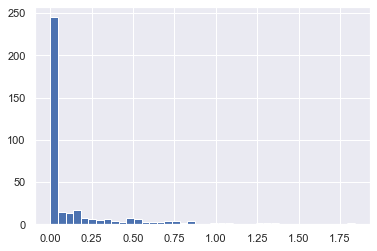

In [8]:
plt.hist(inches, 40)

In [9]:
x = np.array([1, 2, 3, 4, 5])
x < 3 # less than

array([ True,  True, False, False, False])

In [12]:
x > 3

array([False, False, False,  True,  True])

In [13]:
x <= 3

array([ True,  True,  True, False, False])

In [14]:
x >= 3

array([False, False,  True,  True,  True])

In [15]:
x != 3

array([ True,  True, False,  True,  True])

In [16]:
x == 3

array([False, False,  True, False, False])

In [17]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])


| Operator | Equivalent ufunc |
|----------|------------------|
| == | np.equal |
| != | np.not_equal |
| < | np.less |
| <= | np.less_equal |
| > | np.greater |
| >= | np.greater_equal |

In [19]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [20]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In [21]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

In [24]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [25]:
np.sum(x < 6)

8

In [28]:
# how many values less than 6 in each row?
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [29]:
# are there any values greater than 8?
np.any(x > 8)

True

In [30]:
# are there any values less than zero?
np.any(x < 0)

False

In [31]:
# are all values less than 10?
np.all(x < 10)

True

In [32]:
# are all values equal to 6?
np.all(x == 6)

False

In [33]:
# are all values in each row less than 8?
np.all(x < 8, axis = 1)

array([ True, False,  True])

### Boolean operators

In [34]:
np.sum((inches > 0.5) & (inches < 1))

29

In [35]:
inches > (0.5 & inches) < 1

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [37]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

| Operator | Equivalent ufunc |
| ---- | --- |
| & | np.bitwise_and |
| \| | np.bitwise_or |
| ^ | np.bitwise_xor |
| ~ | np.bitwise_not |

In [39]:
print("Number of days without rain:        ", np.sum(inches == 0))
print("Number of days with rain:           ", np.sum(inches != 0))
print("Days with more than 0.5 inches:     ", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches:       ", np.sum((inches > 0) & (inches < 0.2)))

Number of days without rain:         215
Number of days with rain:            150
Days with more than 0.5 inches:      37
Rainy days with < 0.2 inches:        75


## Boolean Arrays as Masks

In [40]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [41]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [42]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [43]:
# construct a mask of all rainy days
rainy = (inches > 0)

In [45]:
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print("Median precip on rainy days in 2014 (inches):    ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):   ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):  ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches): ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):     0.19488188976377951
Median precip on summer days in 2014 (inches):    0.0
Maximum precip on summer days in 2014 (inches):   0.8503937007874016
Median precip on non-summer rainy days (inches):  0.20078740157480315


### Using the Keywords and/or Versus the Operators &/|

In [46]:
bool(42), bool(0)

(True, False)

In [47]:
bool(42 and 0)

False

In [48]:
bool(42 or 0)

True

In [49]:
bin(42)

'0b101010'

In [50]:
bin(59)

'0b111011'

In [51]:
bin(42 & 59)

'0b101010'

In [52]:
bin(42 | 59)

'0b111011'

In [53]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [54]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [56]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()